In [ ]:
from google.colab import drive
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_to_zip_file = "/content/drive/My\ Drive/fast_ai/datasets/archive.zip"

In [ ]:
! unzip {path_to_zip_file} 

Archive:  /content/drive/My Drive/fast_ai/datasets/archive.zip
  inflating: dataset/with_mask/image_0.png  
  inflating: dataset/with_mask/image_1.png  
  inflating: dataset/with_mask/image_10.png  
  inflating: dataset/with_mask/image_100.png  
  inflating: dataset/with_mask/image_101.png  
  inflating: dataset/with_mask/image_102.png  
  inflating: dataset/with_mask/image_103.png  
  inflating: dataset/with_mask/image_104.png  
  inflating: dataset/with_mask/image_105.png  
  inflating: dataset/with_mask/image_106.png  
  inflating: dataset/with_mask/image_107.png  
  inflating: dataset/with_mask/image_108.png  
  inflating: dataset/with_mask/image_109.png  
  inflating: dataset/with_mask/image_11.png  
  inflating: dataset/with_mask/image_110.png  
  inflating: dataset/with_mask/image_111.png  
  inflating: dataset/with_mask/image_112.png  
  inflating: dataset/with_mask/image_113.png  
  inflating: dataset/with_mask/image_114.png  
  inflating: dataset/with_mask/image_115.png  
  i

In [ ]:
path = Path('/content/dataset')
path.ls()

[PosixPath('/content/dataset/without_mask'),
 PosixPath('/content/dataset/with_mask')]

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [ ]:
data.classes

['with_mask', 'without_mask']

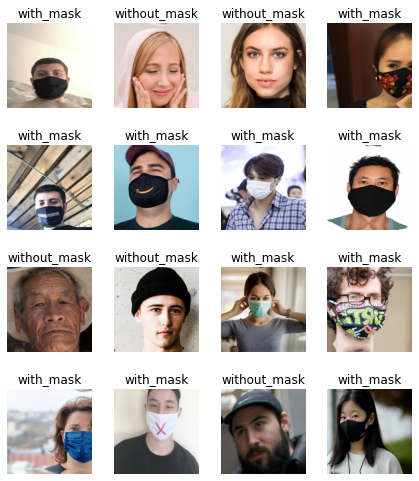

In [ ]:
data.show_batch(rows=4, figsize=(6,7))

In [ ]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['with_mask', 'without_mask'], 352, 88)

In [ ]:
model = cnn_learner(data, models.resnet34, metrics= accuracy)

In [ ]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.844747,0.707354,0.784091,00:15
1,0.426834,0.292606,0.943182,00:14
2,0.278168,0.115313,0.965909,00:14
3,0.207984,0.056939,0.977273,00:15


In [ ]:
model.save('stage-1')

In [ ]:
model.unfreeze()

In [ ]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


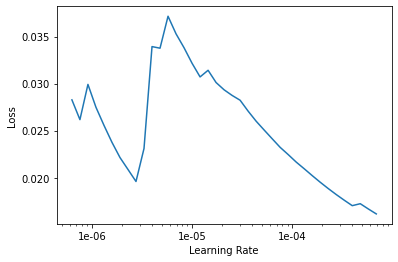

In [ ]:
model.recorder.plot()

In [ ]:
model.fit_one_cycle(2, max_lr=1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.006188,0.018310,0.988636,00:15
1,0.006051,0.001699,1.000000,00:15


In [ ]:
model.save('stage-2')

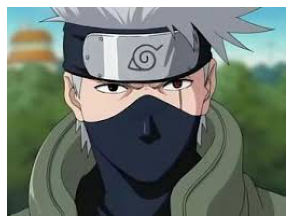

In [ ]:
img = open_image('/content/kakashi.jpeg')
show_image(img, figsize=(5,5))

In [ ]:
pred = model.predict(img)
print (model.data.classes[pred[1]])

with_mask


In [ ]:
model.export('mask_recognition.pkl')